In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn plotting style
sns.set_style(
    "darkgrid",
    {
        "axes.facecolor": ".95",
        "axes.edgecolor": "#000000",
        "grid.color": "#EBEBE7",
        "font.family": "serif",
        "axes.labelcolor": "#000000",
        "xtick.color": "#000000",
        "ytick.color": "#000000",
        "grid.alpha": 0.4,
    },
)

# Get the colorblind palette colors
colorblind_palette = sns.color_palette("colorblind")

blue = colorblind_palette[0]
orange = colorblind_palette[3]
green = colorblind_palette[2]

blue = "darkslateblue"  # Trying different colors for blue

COLORS = {"oracle": blue, "misspec": orange, "bayesian": green}

FILL_COLORS = {"oracle": blue, "misspec": orange, "bayesian": green}

In [92]:
all_dist_oracle = np.load('../results/bayesian_civ_distances.npy')
all_dist_misspec = np.load('../results/bayesian_civ_misspec_distances.npy')
all_dist_bayesian = np.load('../results/bayesian_civ_bayesian_distances.npy')
all_shd_bayesian = np.load('../results/bayesian_civ_shd.npy')

In [93]:
# Compute mean and std
std_scaling = .25

mean_oracle = np.mean(all_dist_oracle, axis=0)
std_oracle = np.std(all_dist_oracle, axis=0) * std_scaling

mean_misspec = np.mean(all_dist_misspec, axis=0)
std_misspec = np.std(all_dist_misspec, axis=0) * std_scaling

mean_bayesian = np.mean(all_dist_bayesian, axis=0)
std_bayesian = np.std(all_dist_bayesian, axis=0) * std_scaling

mean_shd = np.mean(all_shd_bayesian, axis=0)
std_shd = np.std(all_shd_bayesian, axis=0)

In [94]:
def smoothing(y, window_size=5):
    for i in range(len(y)):
        y[i] = np.mean(y[max(0, i-window_size):min(len(y), i+window_size)])
    return y

mean_oracle = smoothing(mean_oracle)
std_oracle = smoothing(std_oracle)
mean_misspec = smoothing(mean_misspec)
std_misspec = smoothing(std_misspec)
mean_bayesian = smoothing(mean_bayesian)
std_bayesian = smoothing(std_bayesian)


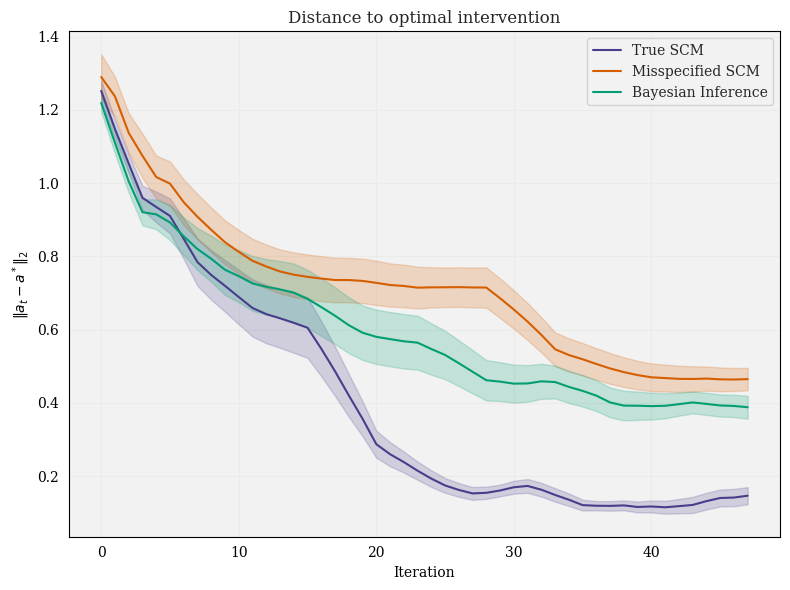

In [96]:
fig, ax = plt.subplots(figsize=(8, 6))

n_iters = -1
mean_oracle = mean_oracle[:n_iters]
std_oracle = std_oracle[:n_iters]
mean_misspec = mean_misspec[:n_iters]
std_misspec = std_misspec[:n_iters]
mean_bayesian = mean_bayesian[:n_iters]
std_bayesian = std_bayesian[:n_iters]

steps = np.arange(mean_oracle.shape[0])

ax.plot(steps, mean_oracle, label='True SCM', color=COLORS["oracle"])
ax.fill_between(steps, mean_oracle - std_oracle, mean_oracle + std_oracle, alpha=0.2, color=FILL_COLORS["oracle"])

ax.plot(steps, mean_misspec, label='Misspecified SCM', color=COLORS["misspec"])
ax.fill_between(steps, mean_misspec - std_misspec, mean_misspec + std_misspec, alpha=0.2, color=FILL_COLORS["misspec"])

ax.plot(steps, mean_bayesian, label='Bayesian Inference', color=COLORS["bayesian"])
ax.fill_between(steps, mean_bayesian - std_bayesian, mean_bayesian + std_bayesian, alpha=0.2, color=FILL_COLORS["bayesian"])

ax.set_xlabel('Iteration')
ax.set_ylabel(r'$\|a_t - a^*\|_2$')
ax.set_title('Distance to optimal intervention')
ax.legend()

plt.tight_layout()
plt.show()